In [1]:
import sys
sys.path.append('investigation_functions')
import ml_funcs as mlf
import ml_visualisation_funcs as mlvf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import data_process_funcs as dpf

In [2]:
from sklearn.svm import SVC

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService
import config

service = QiskitRuntimeService(
    channel=config.channel,
    token=config.tokenJAPI,
    instance=config.instanceJAPI # Optional: include this if using a specific instance
)

In [4]:
nr_qubits =4

initial_list = mlf.get_HSR_array_all_backends(nr_qubits, updated_results=True, updated_service=service) #[df_h,df_s, df_r]
test_table_HSR4q = mlf.get_HSR_test_table(initial_list) # Only for adding to CSV

In [5]:
df_S4 = initial_list[2]
df_S4p = mlf.apply_preprosessing(df_S4)

In [6]:
model1 = SVC(kernel = 'poly',degree = 5)
model2 = SVC(kernel = 'rbf', C = 450)
model3 = SVC(kernel = 'poly', C = 450, coef0 = 0.5)
model4 = SVC(kernel = 'poly', C = 450, degree = 5)
model5 = SVC(kernel = 'linear', C = 450)

models = [model1, model2, model3, model4, model5]
model_names = ['poly_deg5', 'rbf_c450', 'poly_c450_coef0_0.5', 'poly_c450_deg5', 'linear_c450']

Model=SVC(degree=5, kernel='poly'), Accuracy=0.9916666666666667, CV_Accuracy=0.9833333333333332
CV_Scores=[0.99479167 0.97916667 0.96875    0.984375   0.98958333]
Model=SVC(C=450), Accuracy=1.0, CV_Accuracy=0.996875
CV_Scores=[1.         0.99479167 0.98958333 1.         1.        ]
Model=SVC(C=450, coef0=0.5, kernel='poly'), Accuracy=1.0, CV_Accuracy=0.99375
CV_Scores=[1.         0.984375   0.98958333 0.99479167 1.        ]
Model=SVC(C=450, degree=5, kernel='poly'), Accuracy=1.0, CV_Accuracy=0.9916666666666666
CV_Scores=[0.99479167 0.984375   0.984375   0.99479167 1.        ]
Model=SVC(C=450, kernel='linear'), Accuracy=0.9291666666666667, CV_Accuracy=0.903125
CV_Scores=[0.91145833 0.91145833 0.86979167 0.89583333 0.92708333]


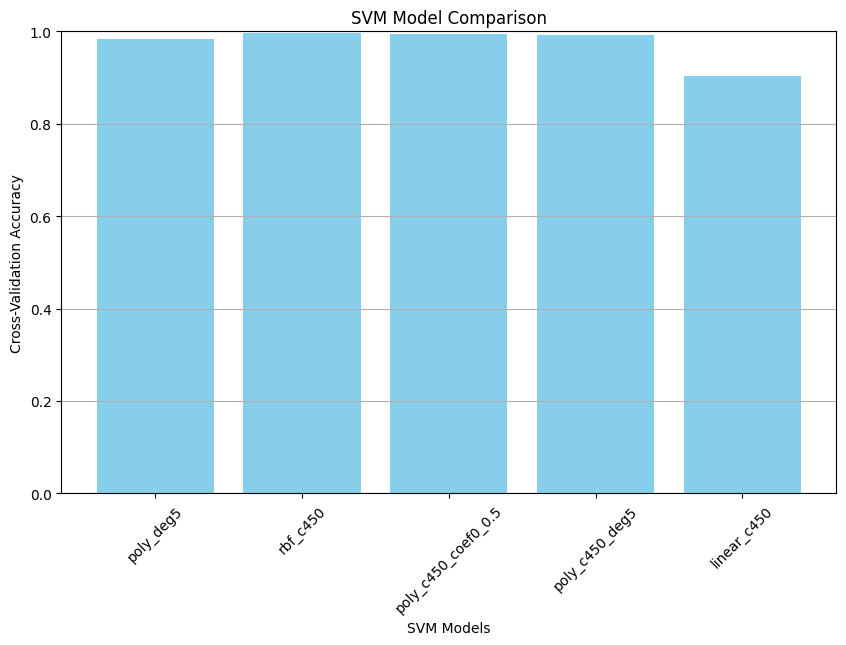

[np.float64(0.9833333333333332),
 np.float64(0.996875),
 np.float64(0.99375),
 np.float64(0.9916666666666666),
 np.float64(0.903125)]

In [7]:
mlvf.print_and_plot_svm_models(df_S4p, models, model_names)

Model=SVC(degree=5, kernel='poly'), Accuracy=0.9916666666666667, CV_Accuracy=0.9833333333333332
CV_Scores=[0.99479167 0.97916667 0.96875    0.984375   0.98958333]
Model=SVC(C=450), Accuracy=1.0, CV_Accuracy=0.996875
CV_Scores=[1.         0.99479167 0.98958333 1.         1.        ]
Model=SVC(C=450, coef0=0.5, kernel='poly'), Accuracy=1.0, CV_Accuracy=0.99375
CV_Scores=[1.         0.984375   0.98958333 0.99479167 1.        ]
Model=SVC(C=450, degree=5, kernel='poly'), Accuracy=1.0, CV_Accuracy=0.9916666666666666
CV_Scores=[0.99479167 0.984375   0.984375   0.99479167 1.        ]
Model=SVC(C=450, kernel='linear'), Accuracy=0.9291666666666667, CV_Accuracy=0.903125
CV_Scores=[0.91145833 0.91145833 0.86979167 0.89583333 0.92708333]


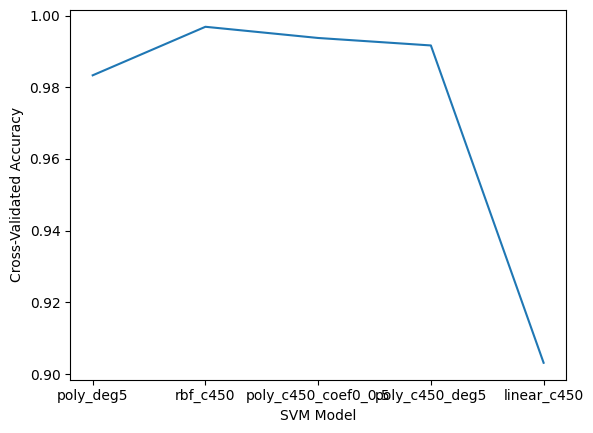

In [15]:
S_scores = []

for model in models:
    fitted_model,score,cv_score = mlf.std_split_fit_and_scores(df_S4p,model)
    print(f"Model={model}, Accuracy={score}, CV_Accuracy={cv_score.mean()}")
    print(f"CV_Scores={cv_score}")
    S_scores.append(cv_score.mean())

plt.plot(model_names, S_scores)
plt.xlabel('SVM Model')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


In [16]:
nr_qubits2 =8

initial_list2 = mlf.get_HSR_array_all_backends(nr_qubits2) #[df_h,df_s, df_r]
test_table_HSR8q = mlf.get_HSR_test_table(initial_list2)

In [17]:
df_S8 = initial_list2[1]
df_S8p = mlf.apply_preprosessing(df_S8)

Model=SVC(degree=5, kernel='poly'), Accuracy=0.975, CV_Accuracy=0.90625
CV_Scores=[0.83854167 0.90104167 0.88541667 0.953125   0.953125  ]
Model=SVC(C=450), Accuracy=0.9958333333333333, CV_Accuracy=1.0
CV_Scores=[1. 1. 1. 1. 1.]
Model=SVC(C=450, coef0=0.5, kernel='poly'), Accuracy=0.9958333333333333, CV_Accuracy=0.9979166666666668
CV_Scores=[1.         0.98958333 1.         1.         1.        ]
Model=SVC(C=450, degree=5, kernel='poly'), Accuracy=0.9833333333333333, CV_Accuracy=0.9885416666666667
CV_Scores=[0.99479167 0.96875    1.         0.99479167 0.984375  ]
Model=SVC(C=450, kernel='linear'), Accuracy=0.9916666666666667, CV_Accuracy=0.9916666666666668
CV_Scores=[0.984375   0.984375   0.98958333 1.         1.        ]


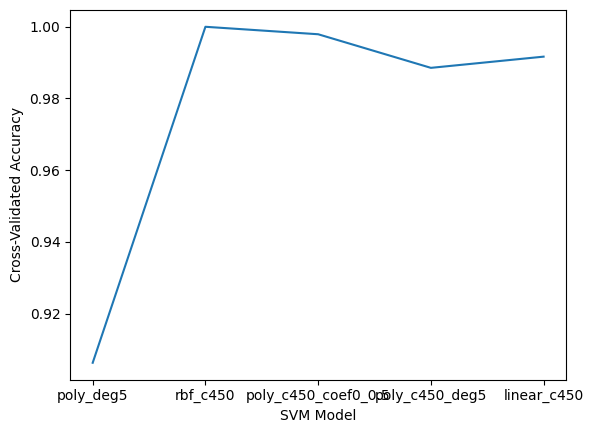

In [18]:
S_scores = []

for model in models:
    fitted_model,score,cv_score = mlf.std_split_fit_and_scores(df_S8p,model)
    print(f"Model={model}, Accuracy={score}, CV_Accuracy={cv_score.mean()}")
    print(f"CV_Scores={cv_score}")
    S_scores.append(cv_score.mean())

plt.plot(model_names, S_scores)
plt.xlabel('SVM Model')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [20]:
nr_qubits3 =16

# initial_list3 = mlf.get_HSR_array_all_backends(nr_qubits3) #[df_h,df_s, df_r]
# test_table_HSR16q = mlf.get_HSR_test_table(initial_list3)
df_R16 = dpf.get_expanded_df('Refreshed_Simulation',nr_qubits3, True, service)
df_R16p = mlf.apply_preprosessing(df_R16)
df_S16 = dpf.get_expanded_df('Simulation',nr_qubits3, True, service)
df_S16p = mlf.apply_preprosessing(df_S16)

Model=SVC(degree=5, kernel='poly'), Accuracy=0.9361702127659575, CV_Accuracy=0.9169018090795312
CV_Scores=[0.84574468 0.93617021 0.91489362 0.88770053 1.        ]
Model=SVC(C=450), Accuracy=1.0, CV_Accuracy=1.0
CV_Scores=[1. 1. 1. 1. 1.]
Model=SVC(C=450, coef0=0.5, kernel='poly'), Accuracy=1.0, CV_Accuracy=0.9989361702127659
CV_Scores=[1.         0.99468085 1.         1.         1.        ]
Model=SVC(C=450, degree=5, kernel='poly'), Accuracy=1.0, CV_Accuracy=0.9957333029923768
CV_Scores=[1.         0.9893617  1.         1.         0.98930481]
Model=SVC(C=450, kernel='linear'), Accuracy=1.0, CV_Accuracy=0.9989361702127659
CV_Scores=[1.         0.99468085 1.         1.         1.        ]


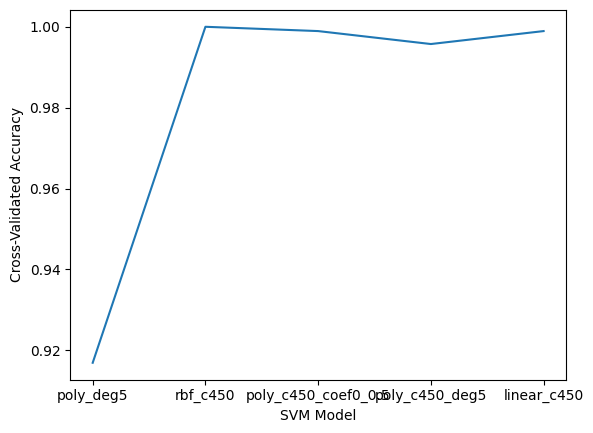

In [21]:
S_scores = []

for model in models:
    fitted_model,score,cv_score = mlf.std_split_fit_and_scores(df_S16p,model)
    print(f"Model={model}, Accuracy={score}, CV_Accuracy={cv_score.mean()}")
    print(f"CV_Scores={cv_score}")
    S_scores.append(cv_score.mean())

plt.plot(model_names, S_scores)
plt.xlabel('SVM Model')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Model=SVC(degree=5, kernel='poly'), Accuracy=0.802547770700637, CV_Accuracy=0.8530539682539683
CV_Scores=[0.84126984 0.824      0.92       0.888      0.792     ]
Model=SVC(C=450), Accuracy=1.0, CV_Accuracy=1.0
CV_Scores=[1. 1. 1. 1. 1.]
Model=SVC(C=450, coef0=0.5, kernel='poly'), Accuracy=1.0, CV_Accuracy=1.0
CV_Scores=[1. 1. 1. 1. 1.]
Model=SVC(C=450, degree=5, kernel='poly'), Accuracy=1.0, CV_Accuracy=1.0
CV_Scores=[1. 1. 1. 1. 1.]
Model=SVC(C=450, kernel='linear'), Accuracy=1.0, CV_Accuracy=1.0
CV_Scores=[1. 1. 1. 1. 1.]


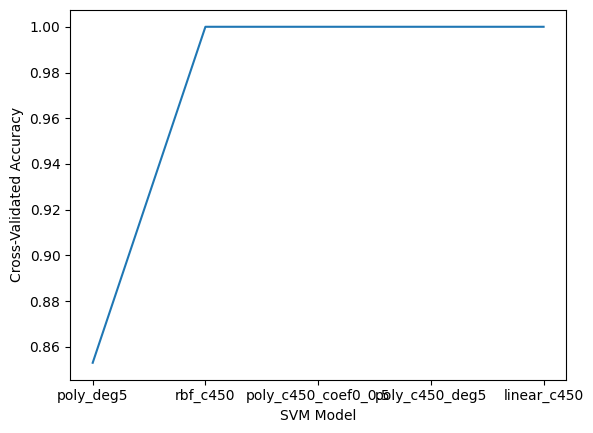

In [22]:
S_scores = []

for model in models:
    fitted_model,score,cv_score = mlf.std_split_fit_and_scores(df_R16p,model)
    print(f"Model={model}, Accuracy={score}, CV_Accuracy={cv_score.mean()}")
    print(f"CV_Scores={cv_score}")
    S_scores.append(cv_score.mean())

plt.plot(model_names, S_scores)
plt.xlabel('SVM Model')
plt.ylabel('Cross-Validated Accuracy')
plt.show()